In [1]:
%matplotlib inline
""" handling files support packages """
from glob import glob

""" logic support packages """
import numpy as np
import pandas as pd

""" plot support packages """
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
import pydotplus
from matplotlib.pyplot import imshow

""" image trasformation packages """
from PIL import Image
import skimage.io as skio

""" statistical data visualization packages"""
import seaborn as sns

""" machine learning functions """
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

""" seaborn configurations """
sns.set_style('white')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
from funcoes import *

In [3]:
captchas_files = sorted(glob('../testes/captcha_teste*.png'))
imgs = skio.imread_collection(captchas_files)

In [4]:
unblobbed = [remove_small_blobs(img, min_area=50, background=255) for img in imgs]

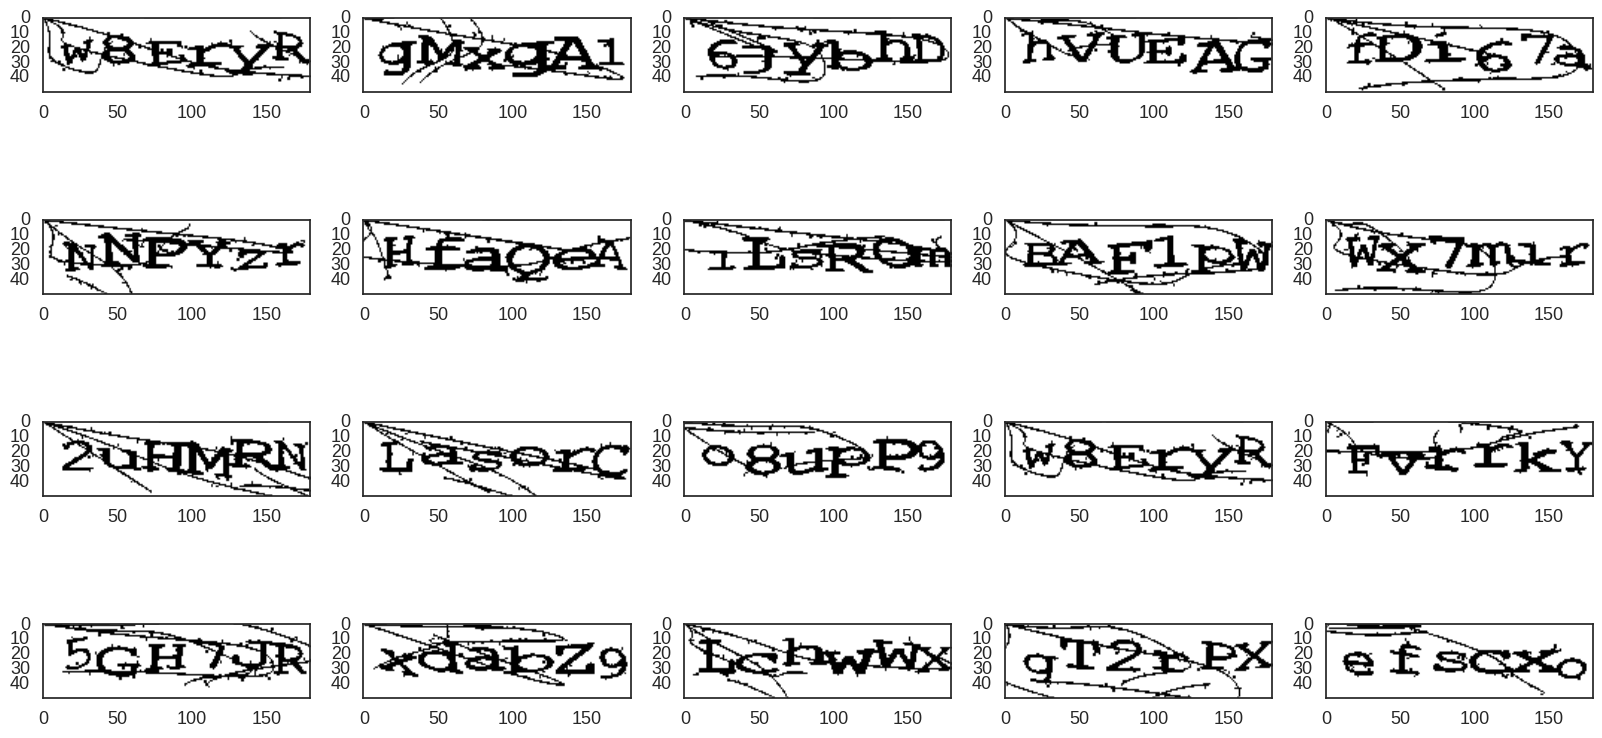

In [5]:
plot_captchas( unblobbed, (4, 5) )

In [6]:
certo = ['w8EryR', 'gMxgA1', '6jybhD', 'hVUEAG', 'fDi67a',
        'NNPYzr', 'HfaQeA', 'iLsROm', 'BAF1pW', 'Wx7m1r',
        '2uHMRN', 'Lasorc', 'o8upp9', 'w8EryR', 'FvrrkY',
        '5GH7JR', 'xdabZ9', 'Lchwwx', 'gT2rPX', 'efsCXo']

# Tentativa com funções super_score

In [7]:
respostasSS = []
for i, captcha in enumerate(unblobbed):
    resposta = quebra_captcha(captcha)
    print("resposta "+ str(i) + ": " + resposta)
    respostasSS.append(resposta)

resposta 0: x8HcYB
resposta 1: 1MkgA1
resposta 2: pjybhh
resposta 3: hVOBAC
resposta 4: tJ1w7a
resposta 5: rNFTzt
resposta 6: HfaQeA
resposta 7: gLzEUv
resposta 8: HAF1pB
resposta 9: kK7m11
resposta 10: 7uUMBn
resposta 11: 5sss1t
resposta 12: bEupP9
resposta 13: x8HcYB
resposta 14: xvtrk1
resposta 15: 91H7Jz
resposta 16: xdabCu
resposta 17: LzUwkA
resposta 18: gT3H1z
resposta 19: e1ccxs


In [8]:
print(respostasSS)

['x8HcYB', '1MkgA1', 'pjybhh', 'hVOBAC', 'tJ1w7a', 'rNFTzt', 'HfaQeA', 'gLzEUv', 'HAF1pB', 'kK7m11', '7uUMBn', '5sss1t', 'bEupP9', 'x8HcYB', 'xvtrk1', '91H7Jz', 'xdabCu', 'LzUwkA', 'gT3H1z', 'e1ccxs']


# Tentativa com modelo ML

In [9]:
respostasML = []
for i, captcha in enumerate(unblobbed):
    resposta = modela_captcha(captcha)
    print("resposta "+ str(i) + ": " + resposta)
    respostasML.append(resposta)

resposta 0: v8Pt8A
resposta 1: gkndTr
resposta 2: Fjys2h
resposta 3: sZvabL
resposta 4: 1O1871
resposta 5: seBTss
resposta 6: VjEj9p
resposta 7: 3T92MP
resposta 8: pag1nZ
resposta 9: 3N71n1
resposta 10: 1upnRO
resposta 11: n9sszc
resposta 12: qBJpNv
resposta 13: v8Pt8A
resposta 14: tpnrnu
resposta 15: rS57ip
resposta 16: xzGjEn
resposta 17: HduwZh
resposta 18: nYG11x
resposta 19: Krbkku


In [10]:
print(respostasML)

['v8Pt8A', 'gkndTr', 'Fjys2h', 'sZvabL', '1O1871', 'seBTss', 'VjEj9p', '3T92MP', 'pag1nZ', '3N71n1', '1upnRO', 'n9sszc', 'qBJpNv', 'v8Pt8A', 'tpnrnu', 'rS57ip', 'xzGjEn', 'HduwZh', 'nYG11x', 'Krbkku']


In [27]:
ML = []
super_score = []
for i, captcha in enumerate(certo):

    ML.append(0)
    super_score.append(0)
    
    for j, letra in enumerate(captcha):
        if (letra == respostasSS[i][j]):
            super_score[i] += 1
        if (letra == respostasML[i][j]):
            ML[i] += 1
    
    #if (captcha == respostasSS[i]):
    #    super_score.append(1)
    #else:
    #    super_score.append(0)
        
    #if (captcha == respostasML[i]):
    #    ML.append(1)
    #else:
    #    ML.append(0)

In [30]:
print(ML)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0]


In [32]:
print("pontos totais: " + str(sum(ML)))

pontos totais: 17


In [33]:
super_score

[1, 4, 4, 3, 2, 2, 6, 1, 4, 3, 2, 1, 3, 1, 3, 3, 4, 2, 2, 1]

In [34]:
print("pontos totais: " + str(sum(super_score)))

pontos totais: 52


# Conclusão

Técnica *super_score* obteve melhores resultados na previsão.